In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
import json
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | nguiu
City not found. Skipping...
Processing Record 5 of Set 1 | waddan
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | ewo
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | fairbanks
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | ternate
Processing Record 15 of Set 1 | buraydah
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | pavia
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | ka

Processing Record 39 of Set 4 | kargasok
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | turukhansk
Processing Record 42 of Set 4 | derzhavinsk
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | umiray
Processing Record 45 of Set 4 | koulikoro
Processing Record 46 of Set 4 | mayor pablo lagerenza
Processing Record 47 of Set 4 | santokhgarh
Processing Record 48 of Set 4 | nishihara
Processing Record 49 of Set 4 | chanute
Processing Record 50 of Set 4 | chagda
City not found. Skipping...
Processing Record 1 of Set 5 | capao da canoa
Processing Record 2 of Set 5 | yerbogachen
Processing Record 3 of Set 5 | the valley
Processing Record 4 of Set 5 | thamaga
Processing Record 5 of Set 5 | cherskiy
Processing Record 6 of Set 5 | weihe
Processing Record 7 of Set 5 | te anau
Processing Record 8 of Set 5 | omboue
Processing Record 9 of Set 5 | yulara
Processing Record 10 of Set 5 | ixtapa
Processing Record 11 of Set 5 

Processing Record 30 of Set 8 | ushtobe
Processing Record 31 of Set 8 | merritt
Processing Record 32 of Set 8 | torbat-e jam
Processing Record 33 of Set 8 | morristown
Processing Record 34 of Set 8 | olean
Processing Record 35 of Set 8 | rafaela
Processing Record 36 of Set 8 | una
Processing Record 37 of Set 8 | sabang
Processing Record 38 of Set 8 | niamey
Processing Record 39 of Set 8 | warmbad
Processing Record 40 of Set 8 | vanimo
Processing Record 41 of Set 8 | sorsk
Processing Record 42 of Set 8 | alamosa
Processing Record 43 of Set 8 | joensuu
Processing Record 44 of Set 8 | kurumkan
Processing Record 45 of Set 8 | ardakan
Processing Record 46 of Set 8 | encantado
Processing Record 47 of Set 8 | okhotsk
Processing Record 48 of Set 8 | iquitos
Processing Record 49 of Set 8 | beringovskiy
Processing Record 50 of Set 8 | forbes
Processing Record 1 of Set 9 | coquimbo
Processing Record 2 of Set 9 | san miguel
Processing Record 3 of Set 9 | talusan
Processing Record 4 of Set 9 | lasa

Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | oranjestad
Processing Record 21 of Set 12 | san carlos de bariloche
Processing Record 22 of Set 12 | beihai
Processing Record 23 of Set 12 | half moon bay
Processing Record 24 of Set 12 | paducah
Processing Record 25 of Set 12 | kalmar
Processing Record 26 of Set 12 | gibsons
Processing Record 27 of Set 12 | vryburg
Processing Record 28 of Set 12 | sao paulo de olivenca
Processing Record 29 of Set 12 | hildburghausen
Processing Record 30 of Set 12 | vanavara
Processing Record 31 of Set 12 | bani
Processing Record 32 of Set 12 | avera
Processing Record 33 of Set 12 | marawi
Processing Record 34 of Set 12 | marsabit
Processing Record 35 of Set 12 | chapais
Processing Record 36 of Set 12 | cabadiangan
Processing Record 37 of Set 12 | san patricio
Processing Record 38 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 39 of Set 12 | jurmala
Processing Record 40 of Set 12 | lavrentiya
Processing Rec

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,10.44,100,78,0.72,RU,2021-09-29 14:10:29
1,Mahebourg,-20.4081,57.7000,74.25,70,51,13.31,MU,2021-09-29 14:10:29
2,Waddan,29.1614,16.1390,92.35,19,0,12.73,LY,2021-09-29 14:10:30
3,Puerto Ayora,-0.7393,-90.3518,70.30,88,100,8.70,EC,2021-09-29 14:10:30
4,Arraial Do Cabo,-22.9661,-42.0278,84.06,58,20,3.44,BR,2021-09-29 14:10:30
...,...,...,...,...,...,...,...,...,...
572,Port Macquarie,-31.4333,152.9167,60.76,72,100,14.92,AU,2021-09-29 14:13:19
573,Gardez,33.5974,69.2259,67.60,48,8,6.73,AF,2021-09-29 14:13:19
574,Olavarria,-36.8927,-60.3225,57.02,86,0,14.29,AR,2021-09-29 14:13:20
575,Denizli,37.8402,29.0698,81.45,28,13,9.42,TR,2021-09-29 14:13:20


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

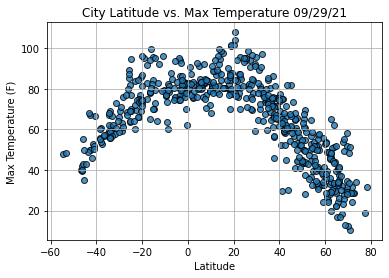

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

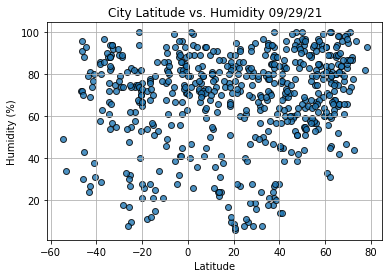

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

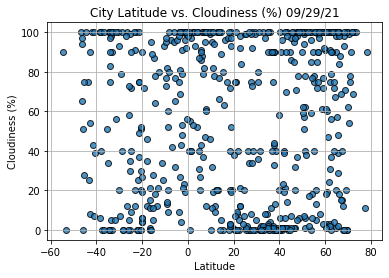

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

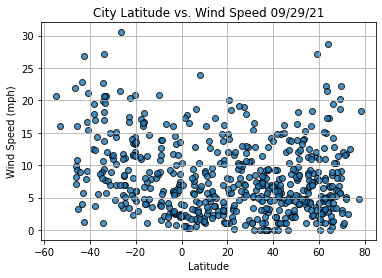

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()